<a href="https://colab.research.google.com/github/AhmedWael2000/Perceptron_Adaline_from_Scratch/blob/main/Perceptron_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('/content/data_banknote_authentication.csv')
df

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [85]:
df.shape

(1371, 5)

# Shuffling, Normalizing the dataframe and converting it to numpy array

In [86]:
df = df.sample(frac=1)

In [87]:
df.columns = ['varience', 'skewness', 'col_3', 'col_4', 'label']
Y = df['label']
# normalization
df['varience']=(df['varience'] - df['varience'].mean())/(df['varience'].std())
df['skewness']=(df['skewness'] - df['skewness'].mean())/(df['skewness'].std())
X=X = df.drop(['label', 'col_3', 'col_4'], axis=1)


In [88]:
X = X.to_numpy()

In [89]:
Y = Y.to_numpy()

# Standerdization

In [90]:

X

array([[-0.01936329, -0.46708364],
       [ 0.73927672,  0.9560707 ],
       [ 0.42694541,  1.01284978],
       ...,
       [ 0.30416593,  0.40353119],
       [ 0.02699036, -0.24528908],
       [-0.75909033, -1.35321217]])

<Axes: xlabel='varience', ylabel='skewness'>

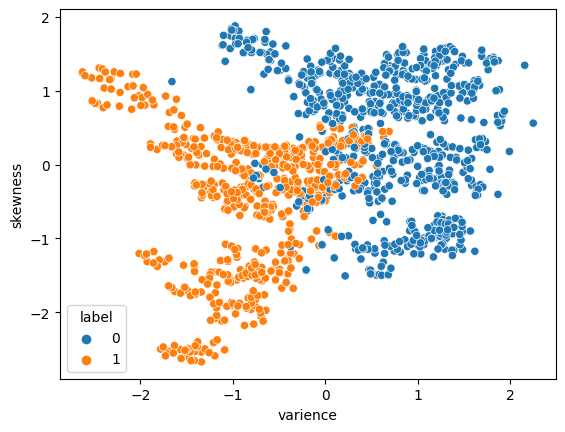

In [91]:
sns.scatterplot(data = df, x='varience', y='skewness', hue='label')

# Perceptron algorithm

In [92]:
def threshold(z):
  return (z > 0).astype(int)

In [93]:
def Perceptron(X, y, w, b, l, iter):
  for _ in range(iter):
    for i in range(X.shape[0]):
      y_hat = threshold(np.sum((X[i] * w) + b))
      w += l*(y[i] - y_hat) * X[i]
      b += l*(y[i] - y_hat)
  
  return w, b

In [94]:
w = np.random.randn(1, 2)
b = np.zeros(1)
print(w, b)

[[-0.71263003  0.5520599 ]] [0.]


In [95]:
w, b = Perceptron(X, Y, w, b, l=0.005, iter=1000)
print(w, b)

[[-0.01028153 -0.00367149]] [1.73472348e-18]


In [96]:
def calc_error(y_hat, y):
  return np.sum((y_hat-y) ** 2) / y.shape[0]

In [97]:
y_hat = threshold(np.sum((X * w) + b, axis=1))
y_hat

array([1, 0, 0, ..., 0, 1, 1])

# Perceptron Error

In [98]:
Perceptron_error = calc_error(y_hat, Y)
Perceptron_error

0.13274981765134938

In [99]:
print(y_hat, Y)

[1 0 0 ... 0 1 1] [1 0 0 ... 1 1 1]


# Perceptron Boundry

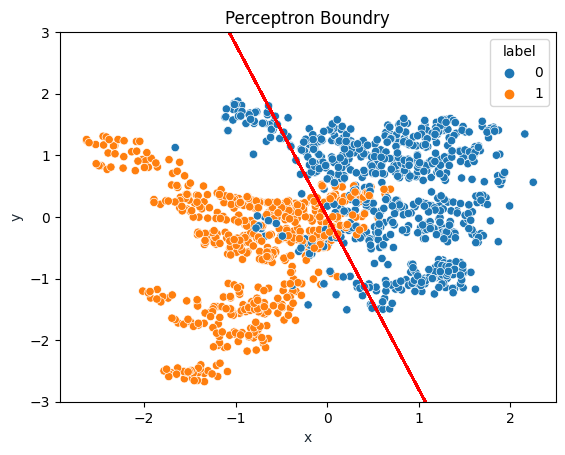

In [100]:
x_plot = X
y_plot = (-x_plot * w[:, 0] -b) / w[:, 1]
sns.scatterplot(data = df, x='varience', y='skewness', hue='label')
# plt.scatter(df['varience'][df['label']==0],df['skewness'][df['label']==0])
# plt.scatter(df['varience'][df['label']==1],df['skewness'][df['label']==1],color='green')
plt.plot(x_plot, y_plot, 'r', label='X2 = (-x1*w1)/w2')
# sns.lineplot(x=x_plot, y=y_plot)
plt.title('Perceptron Boundry')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.ylim([-3,3])
plt.show()

# Adaline algorithm

In [101]:
def adaline(X, y, w, b, l, iter):
  # for _ in range(iter):
  #   #  W => (1,2) / X => (1371, 2)
  #   y_hat = np.sum(w * X, axis=1) + b
      
  #   w[0, 0] -= l * np.sum((y - y_hat) * X[:, 0]) / X.shape[0]
  #   w[0, 1] -= l * np.sum((y - y_hat) * X[:, 1]) / X.shape[0]
  #   b -= l * np.sum(y - y_hat) / X.shape[0]

  y=y.reshape(-1,1)
  
  for j in range(iter):
    # print some stats during training
    if j %(iter/10)==0:
      print(f"iter: {j} w:{w} b:{b} ")
    
    z = np.dot(X,w.T)+b
    w += l*np.dot((y - z).T, X)/len(X)
    b += l*np.sum((y - z))/len(X)

  return w, b

In [102]:
w = np.random.randn(1, 2)
b = np.zeros(1)
print(w, b)

[[ 0.26724755 -0.11402471]] [0.]


In [103]:
w, b = adaline(X, Y, w, b, l=0.01, iter=10000)
print(w, b)

iter: 0 w:[[ 0.26724755 -0.11402471]] b:[0.] 
iter: 1000 w:[[-0.32442436 -0.13556701]] b:[0.4449115] 
iter: 2000 w:[[-0.32460155 -0.13539168]] b:[0.44493071] 
iter: 3000 w:[[-0.32460166 -0.13539157]] b:[0.44493071] 
iter: 4000 w:[[-0.32460166 -0.13539157]] b:[0.44493071] 
iter: 5000 w:[[-0.32460166 -0.13539157]] b:[0.44493071] 
iter: 6000 w:[[-0.32460166 -0.13539157]] b:[0.44493071] 
iter: 7000 w:[[-0.32460166 -0.13539157]] b:[0.44493071] 
iter: 8000 w:[[-0.32460166 -0.13539157]] b:[0.44493071] 
iter: 9000 w:[[-0.32460166 -0.13539157]] b:[0.44493071] 
[[-0.32460166 -0.13539157]] [0.44493071]


In [104]:
def calc_error(y_hat, y):
  return np.sum((y_hat-y) ** 2) / y.shape[0]

In [105]:
y_hat = threshold(np.dot(w , X.T)+b)
y_hat

array([[1, 1, 1, ..., 1, 1, 1]])

In [106]:
adaline_error = calc_error(y_hat, Y)
adaline_error

0.42304886943836617

In [107]:
print(y_hat, Y)

[[1 1 1 ... 1 1 1]] [1 0 0 ... 1 1 1]


# Adaline Boundry

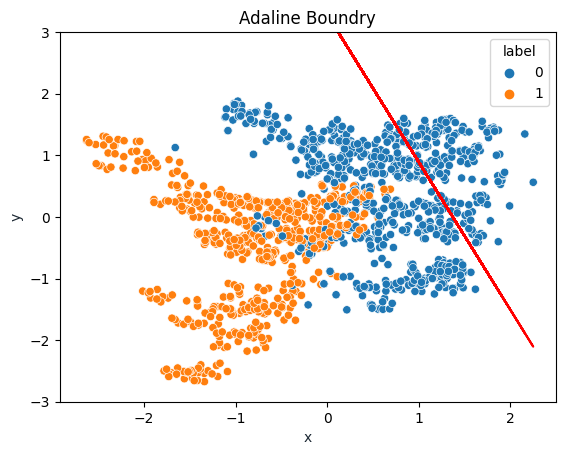

In [109]:
x_plot = X
y_plot = (-x_plot * w[:, 0] -b) / w[:, 1]

sns.scatterplot(data = df, x='varience', y='skewness', hue='label')
plt.plot(x_plot, y_plot, 'r', label='X2 = (-x1*w1)/w2')

plt.title('Adaline Boundry')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.ylim([-3,3])

plt.show()

# Comparizon between errors

In [108]:
print(Perceptron_error, adaline_error)

0.13274981765134938 0.42304886943836617
